Raffi Nurzahid Alaudin

22.11.4930

DATASET: [Depresi Datastet](https://www.kaggle.com/datasets/anthonytherrien/depression-dataset)

In [ ]:
# LOAD DATA
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# PREPROCESSING
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.feature_selection import SelectKBest, f_classif

# MODEL
from sklearn.ensemble import RandomForestClassifier

# EVALUASI
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

## **LOAD DATASET**

In [ ]:
url = "https://drive.google.com/file/d/1Sx5F9XGLW909RZvRt6V0yN9f66n2MISN/view?usp=drive_link"
path = 'https://drive.google.com/uc?export=download&id='+url.split('/')[-2]

In [ ]:
depresi_df = pd.read_csv(path)
depresi_df.head()

,Name,Age,Marital Status,Education Level,Number of Children,Smoking Status,Physical Activity Level,Employment Status,Income,Alcohol Consumption,Dietary Habits,Sleep Patterns,History of Mental Illness,History of Substance Abuse,Family History of Depression,Chronic Medical Conditions
0,Christine Barker,31,Married,Bachelor's Degree,2,Non-smoker,Active,Unemployed,26265.67,Moderate,Moderate,Fair,Yes,No,Yes,Yes
1,Jacqueline Lewis,55,Married,High School,1,Non-smoker,Sedentary,Employed,42710.36,High,Unhealthy,Fair,Yes,No,No,Yes
2,Shannon Church,78,Widowed,Master's Degree,1,Non-smoker,Sedentary,Employed,125332.79,Low,Unhealthy,Good,No,No,Yes,No
3,Charles Jordan,58,Divorced,Master's Degree,3,Non-smoker,Moderate,Unemployed,9992.78,Moderate,Moderate,Poor,No,No,No,No
4,Michael Rich,18,Single,High School,0,Non-smoker,Sedentary,Unemployed,8595.08,Low,Moderate,Fair,Yes,No,Yes,Yes



### FEATURE DESKRIPSI
1. **Nama**: Nama lengkap individu.  
2. **Usia**: Usia individu dalam tahun.  
3. **Status Perkawinan**: Status perkawinan individu. Nilai yang mungkin meliputi Lajang, Menikah, Bercerai, dan Janda/Duda.  
4. **Tingkat Pendidikan**: Tingkat pendidikan tertinggi yang telah dicapai oleh individu. Nilai yang mungkin meliputi SMA, Diploma, Sarjana, Magister, dan Doktor.  
5. **Jumlah Anak**: Jumlah anak yang dimiliki oleh individu.  
6. **Status Merokok**: Menunjukkan apakah individu adalah perokok atau tidak. Nilai yang mungkin adalah Perokok, Mantan Perokok, dan Tidak Merokok.  
7. **Tingkat Aktivitas Fisik**: Tingkat aktivitas fisik yang dilakukan oleh individu. Nilai yang mungkin meliputi Sedentari, Sedang, dan Aktif.  
8. **Status Pekerjaan**: Status pekerjaan individu. Nilai yang mungkin meliputi Bekerja dan Tidak Bekerja.  
9. **Pendapatan**: Pendapatan tahunan individu dalam USD.  
10. **Konsumsi Alkohol**: Tingkat konsumsi alkohol. Nilai yang mungkin meliputi Rendah, Sedang, dan Tinggi.  
11. **Kebiasaan Diet**: Kebiasaan diet individu. Nilai yang mungkin meliputi Sehat, Sedang, dan Tidak Sehat.  
12. **Pola Tidur**: Kualitas tidur. Nilai yang mungkin meliputi Baik, Cukup, dan Buruk.  
13. **Riwayat Penyakit Mental**: Apakah individu memiliki riwayat penyakit mental. Nilai yang mungkin adalah Ya dan Tidak.  
14. **Riwayat Penyalahgunaan Zat**: Apakah individu memiliki riwayat penyalahgunaan zat. Nilai yang mungkin adalah Ya dan Tidak.  
15. **Riwayat Depresi dalam Keluarga**: Menunjukkan apakah ada riwayat depresi dalam keluarga. Nilai yang mungkin adalah Ya dan Tidak.  
16. **Penyakit Kronis**: Apakah individu memiliki kondisi medis kronis. Nilai yang mungkin adalah Ya dan Tidak.  

## **PREPROCESSING DATA**

In [ ]:
# Mengganti Nama Kolom Dalam Bahasa Indonesia
features_indonesia = [
    "Nama",
    "Usia",
    "Status Perkawinan",
    "Tingkat Pendidikan",
    "Jumlah Anak",
    "Status Merokok",
    "Tingkat Aktivitas Fisik",
    "Status Pekerjaan",
    "Pendapatan",
    "Konsumsi Alkohol",
    "Kebiasaan Diet",
    "Pola Tidur",
    "Riwayat Penyakit Mental",
    "Riwayat Penyalahgunaan Zat",
    "Riwayat Depresi dalam Keluarga",
    "Penyakit Kronis"
]

depresi_df.columns = features_indonesia
depresi_df.head()

,Nama,Usia,Status Perkawinan,Tingkat Pendidikan,Jumlah Anak,Status Merokok,Tingkat Aktivitas Fisik,Status Pekerjaan,Pendapatan,Konsumsi Alkohol,Kebiasaan Diet,Pola Tidur,Riwayat Penyakit Mental,Riwayat Penyalahgunaan Zat,Riwayat Depresi dalam Keluarga,Penyakit Kronis
0,Christine Barker,31,Married,Bachelor's Degree,2,Non-smoker,Active,Unemployed,26265.67,Moderate,Moderate,Fair,Yes,No,Yes,Yes
1,Jacqueline Lewis,55,Married,High School,1,Non-smoker,Sedentary,Employed,42710.36,High,Unhealthy,Fair,Yes,No,No,Yes
2,Shannon Church,78,Widowed,Master's Degree,1,Non-smoker,Sedentary,Employed,125332.79,Low,Unhealthy,Good,No,No,Yes,No
3,Charles Jordan,58,Divorced,Master's Degree,3,Non-smoker,Moderate,Unemployed,9992.78,Moderate,Moderate,Poor,No,No,No,No
4,Michael Rich,18,Single,High School,0,Non-smoker,Sedentary,Unemployed,8595.08,Low,Moderate,Fair,Yes,No,Yes,Yes


### **DATA CLEANING**

In [ ]:
# mengecek ukuran, nilai null, dan nilai duplicated pada dataset
print(f"Jumlah Data: {depresi_df.shape[0]}")
print(f"Jumlah Nilai Null: {depresi_df.isnull().sum().sum()}")
print(f"Jumlah Nilai Duplicated: {depresi_df.duplicated().sum()}")

Jumlah Data: 413768
Jumlah Nilai Null: 0
Jumlah Nilai Duplicated: 0


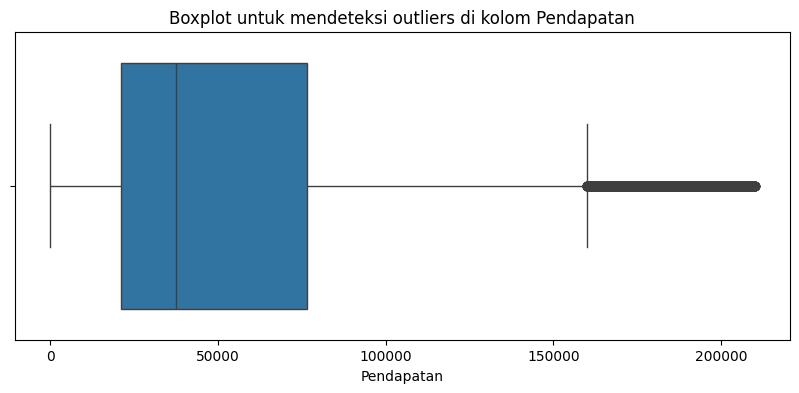


Jumlah outliers: 5157
Nilai outliers: 
[202449.17 169400.38 180084.56 ... 171921.83 169051.46 185657.43]


In [ ]:
def check_outliers(df, column):
    # Visualisasi dengan boxplot
    plt.figure(figsize=(10,4))
    sns.boxplot(x=df[column])
    plt.title(f'Boxplot untuk mendeteksi outliers di kolom {column}')
    plt.show()

    # Hitung outliers dengan IQR method
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)][column]
    print(f"\nJumlah outliers: {len(outliers)}")
    print(f"Nilai outliers: \n{outliers.values}")

check_outliers(depresi_df, 'Pendapatan')

In [ ]:
def handle_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Clip nilai outliers ke batas atas dan bawah
    df[column] = df[column].clip(lower_bound, upper_bound)
    return df

handle_outliers(depresi_df, 'Pendapatan')

,Nama,Usia,Status Perkawinan,Tingkat Pendidikan,Jumlah Anak,Status Merokok,Tingkat Aktivitas Fisik,Status Pekerjaan,Pendapatan,Konsumsi Alkohol,Kebiasaan Diet,Pola Tidur,Riwayat Penyakit Mental,Riwayat Penyalahgunaan Zat,Riwayat Depresi dalam Keluarga,Penyakit Kronis
0,Christine Barker,31,Married,Bachelor's Degree,2,Non-smoker,Active,Unemployed,26265.67,Moderate,Moderate,Fair,Yes,No,Yes,Yes
1,Jacqueline Lewis,55,Married,High School,1,Non-smoker,Sedentary,Employed,42710.36,High,Unhealthy,Fair,Yes,No,No,Yes
2,Shannon Church,78,Widowed,Master's Degree,1,Non-smoker,Sedentary,Employed,125332.79,Low,Unhealthy,Good,No,No,Yes,No
3,Charles Jordan,58,Divorced,Master's Degree,3,Non-smoker,Moderate,Unemployed,9992.78,Moderate,Moderate,Poor,No,No,No,No
4,Michael Rich,18,Single,High School,0,Non-smoker,Sedentary,Unemployed,8595.08,Low,Moderate,Fair,Yes,No,Yes,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413763,Sean Miller,68,Married,Master's Degree,0,Former,Moderate,Employed,109233.43,Low,Healthy,Good,No,No,No,No
413764,Christina Brown,26,Single,Bachelor's Degree,0,Current,Active,Employed,96760.97,Low,Healthy,Poor,Yes,Yes,No,Yes
413765,Matthew Jenkins,57,Married,Bachelor's Degree,0,Non-smoker,Sedentary,Employed,77353.26,Moderate,Moderate,Fair,No,No,Yes,Yes
413766,Gary Faulkner,71,Married,Associate Degree,2,Non-smoker,Sedentary,Unemployed,24557.08,Moderate,Moderate,Poor,No,Yes,No,No


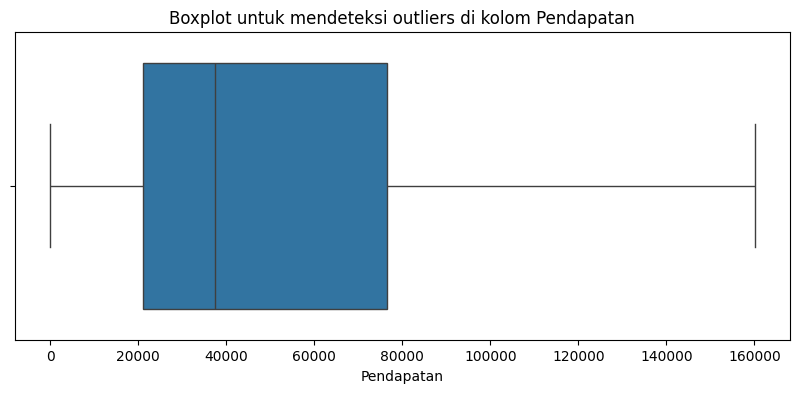


Jumlah outliers: 0
Nilai outliers: 
[]


In [ ]:
check_outliers(depresi_df, 'Pendapatan')

### **ENCODE KOLOM KATEGORIK**

In [ ]:
# membuat list yang masing masing berisi data kategorik dan numerik
categorical_features = depresi_df.select_dtypes(include=["object"]).columns.to_list()
numerical_features = depresi_df.select_dtypes(exclude=["object"]).columns.to_list()

print(f"Jumlah Kolom Numerik: {len(numerical_features)}")
print(f"Kolom: {numerical_features}\n")
print(f"Jumlah Kolom Kategorik: {len(categorical_features)}")
print(f"Kolom: {categorical_features}")

Jumlah Kolom Numerik: 3
Kolom: ['Usia', 'Jumlah Anak', 'Pendapatan']

Jumlah Kolom Kategorik: 13
Kolom: ['Nama', 'Status Perkawinan', 'Tingkat Pendidikan', 'Status Merokok', 'Tingkat Aktivitas Fisik', 'Status Pekerjaan', 'Konsumsi Alkohol', 'Kebiasaan Diet', 'Pola Tidur', 'Riwayat Penyakit Mental', 'Riwayat Penyalahgunaan Zat', 'Riwayat Depresi dalam Keluarga', 'Penyakit Kronis']


In [ ]:
# encode (merubah kolom kategorikal menjadi numerikal dengan menggunakan LabelEncoder)
le = LabelEncoder()
for feature in categorical_features:
    depresi_df[feature] = le.fit_transform(depresi_df[feature])
    print(f"Label Encoder {feature}: {le.classes_}")

Label Encoder Nama: ['Aaron Adams' 'Aaron Aguilar' 'Aaron Aguirre' ... 'Zoe White DDS'
 'Zoe Whitehead' 'Zoe Wilson']
Label Encoder Status Perkawinan: ['Divorced' 'Married' 'Single' 'Widowed']
Label Encoder Tingkat Pendidikan: ['Associate Degree' "Bachelor's Degree" 'High School' "Master's Degree"
 'PhD']
Label Encoder Status Merokok: ['Current' 'Former' 'Non-smoker']
Label Encoder Tingkat Aktivitas Fisik: ['Active' 'Moderate' 'Sedentary']
Label Encoder Status Pekerjaan: ['Employed' 'Unemployed']
Label Encoder Konsumsi Alkohol: ['High' 'Low' 'Moderate']
Label Encoder Kebiasaan Diet: ['Healthy' 'Moderate' 'Unhealthy']
Label Encoder Pola Tidur: ['Fair' 'Good' 'Poor']
Label Encoder Riwayat Penyakit Mental: ['No' 'Yes']
Label Encoder Riwayat Penyalahgunaan Zat: ['No' 'Yes']
Label Encoder Riwayat Depresi dalam Keluarga: ['No' 'Yes']
Label Encoder Penyakit Kronis: ['No' 'Yes']


In [ ]:
depresi_df.head()

,Nama,Usia,Status Perkawinan,Tingkat Pendidikan,Jumlah Anak,Status Merokok,Tingkat Aktivitas Fisik,Status Pekerjaan,Pendapatan,Konsumsi Alkohol,Kebiasaan Diet,Pola Tidur,Riwayat Penyakit Mental,Riwayat Penyalahgunaan Zat,Riwayat Depresi dalam Keluarga,Penyakit Kronis
0,37154,31,1,1,2,2,0,1,26265.67,2,1,0,1,0,1,1
1,78274,55,1,2,1,2,2,0,42710.36,0,2,0,1,0,0,1
2,169167,78,3,3,1,2,2,0,125332.79,1,2,1,0,0,1,0
3,34046,58,0,3,3,2,1,1,9992.78,2,1,2,0,0,0,0
4,133232,18,2,2,0,2,2,1,8595.08,1,1,0,1,0,1,1


### **TRANSFORM DATA NUMERIC**

In [ ]:
# standarisasi fitur
scaler = StandardScaler()
depresi_df[numerical_features] = scaler.fit_transform(depresi_df[numerical_features])
depresi_df.head()

,Nama,Usia,Status Perkawinan,Tingkat Pendidikan,Jumlah Anak,Status Merokok,Tingkat Aktivitas Fisik,Status Pekerjaan,Pendapatan,Konsumsi Alkohol,Kebiasaan Diet,Pola Tidur,Riwayat Penyakit Mental,Riwayat Penyalahgunaan Zat,Riwayat Depresi dalam Keluarga,Penyakit Kronis
0,37154,-0.991298,1,1,0.566692,2,0,1,-0.607460,2,1,0,1,0,1,1
1,78274,0.330380,1,2,-0.241681,2,2,0,-0.192722,0,2,0,1,0,0,1
2,169167,1.596988,3,3,-0.241681,2,2,0,1.891028,1,2,1,0,0,1,0
3,34046,0.495590,0,3,1.375065,2,1,1,-1.017864,2,1,2,0,0,0,0
4,133232,-1.707206,2,2,-1.050054,2,2,1,-1.053114,1,1,0,1,0,1,1


## **EXPLORATORY DATA ANALYSIS**

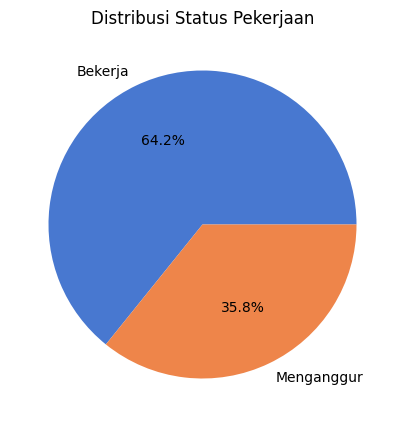

In [ ]:
# pie Chart
plt.figure(figsize=(5, 5))
x = depresi_df['Status Pekerjaan'].value_counts()

plt.pie(x=x.values,
        labels=['Bekerja', "Menganggur"],
        autopct='%1.1f%%',
        colors=sns.color_palette('muted'))

plt.title('Distribusi Status Pekerjaan')
plt.show()

<ipython-input-14-ebfe9df450e1>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=depresi_df, x="Tingkat Pendidikan", palette='pastel')


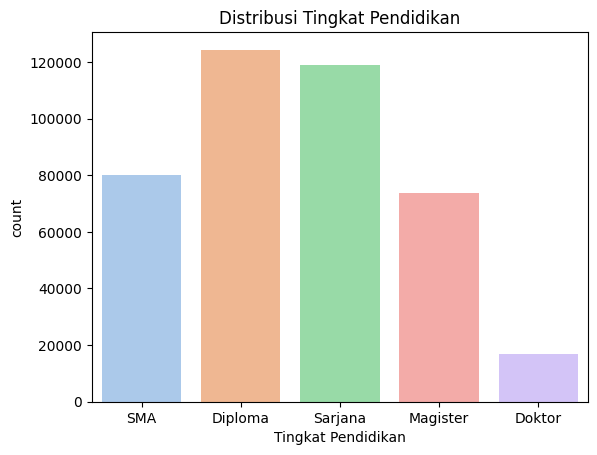

In [ ]:
# bar Chart
sns.countplot(data=depresi_df, x="Tingkat Pendidikan", palette='pastel')
plt.title("Distribusi Tingkat Pendidikan")

plt.xticks(ticks=[0, 1, 2, 3, 4], labels=[ "SMA", "Diploma", "Sarjana", "Magister", "Doktor"])
plt.show()

### **FEATURE SELECTION**

In [ ]:
# mengecek informasi dataset
depresi_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 413768 entries, 0 to 413767
Data columns (total 16 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   Nama                            413768 non-null  int64  
 1   Usia                            413768 non-null  float64
 2   Status Perkawinan               413768 non-null  int64  
 3   Tingkat Pendidikan              413768 non-null  int64  
 4   Jumlah Anak                     413768 non-null  float64
 5   Status Merokok                  413768 non-null  int64  
 6   Tingkat Aktivitas Fisik         413768 non-null  int64  
 7   Status Pekerjaan                413768 non-null  int64  
 8   Pendapatan                      413768 non-null  float64
 9   Konsumsi Alkohol                413768 non-null  int64  
 10  Kebiasaan Diet                  413768 non-null  int64  
 11  Pola Tidur                      413768 non-null  int64  
 12  Riwayat Penyakit

In [ ]:
# membuang kolom yang tidak di perlukan
depresi_df.drop(columns=["Nama"], inplace=True)

In [ ]:
# menentukan kolom target dan feature
X = depresi_df.drop('Penyakit Kronis', axis=1)
y = depresi_df['Penyakit Kronis']

# Pilih k fitur terbaik
selector = SelectKBest(score_func=f_classif, k=10)
selector.fit(X, y)

# Tampilkan skor setiap fitur
scores = pd.DataFrame({
    'Feature': X.columns,
    'Score': selector.scores_
}).sort_values('Score', ascending=False)

print("Skor setiap fitur:")
print(scores)

# Pilih fitur terbaik
selected_features = X.columns[selector.get_support()].tolist()
print("\nFitur terbaik:")
print(selected_features)

Skor setiap fitur:
                           Feature       Score
6                 Status Pekerjaan  745.660681
4                   Status Merokok  718.349540
5          Tingkat Aktivitas Fisik  391.032826
7                       Pendapatan  345.833857
0                             Usia  128.576532
9                   Kebiasaan Diet   86.285867
8                 Konsumsi Alkohol   63.602230
10                      Pola Tidur   55.192569
3                      Jumlah Anak   20.260173
11         Riwayat Penyakit Mental   15.084710
12      Riwayat Penyalahgunaan Zat    4.524547
13  Riwayat Depresi dalam Keluarga    2.139410
2               Tingkat Pendidikan    0.266756
1                Status Perkawinan    0.028141

Fitur terbaik:
['Usia', 'Jumlah Anak', 'Status Merokok', 'Tingkat Aktivitas Fisik', 'Status Pekerjaan', 'Pendapatan', 'Konsumsi Alkohol', 'Kebiasaan Diet', 'Pola Tidur', 'Riwayat Penyakit Mental']


In [ ]:
# UPDATE X
X = depresi_df[selected_features]
y = depresi_df['Penyakit Kronis']

### **Handling Imbalanced Data**

In [ ]:
# Tampilkan distribusi sebelum SMOTE
print("Distribusi kelas sebelum SMOTE:")
print(y.value_counts())

# Terapkan SMOTE
smote = SMOTE(random_state=42)
X_balanced, y_balanced = smote.fit_resample(X, y)

# Tampilkan distribusi setelah SMOTE
print("\nDistribusi kelas setelah SMOTE:")
print(pd.Series(y_balanced).value_counts())

Distribusi kelas sebelum SMOTE:
Penyakit Kronis
0    277561
1    136207
Name: count, dtype: int64

Distribusi kelas setelah SMOTE:
Penyakit Kronis
1    277561
0    277561
Name: count, dtype: int64


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X_balanced,
    y_balanced,
    test_size=0.2,
    random_state=42,
    stratify=y_balanced
)

print(f"Jumlah Data Latih: {len(X_train)}")
print(f"Jumlah Data Uji: {len(X_test)}")

Jumlah Data Latih: 444097
Jumlah Data Uji: 111025


## **MODELING**

In [ ]:
random_forest_model = RandomForestClassifier(
    n_estimators=100,
    max_depth=15,
    random_state=42
)
random_forest_model.fit(X_train, y_train)

RandomForestClassifier(max_depth=15, random_state=42)

## **EVALUASI MODEL**

In [ ]:
y_pred = random_forest_model.predict(X_test)
print(f"Akurasi:{ accuracy_score(y_test, y_pred) : .2f}")
print(f"Classification Report:\n{classification_report(y_test, y_pred)}")

Akurasi: 0.58
Classification Report:
              precision    recall  f1-score   support

           0       0.56      0.75      0.64     55513
           1       0.62      0.42      0.50     55512

    accuracy                           0.58    111025
   macro avg       0.59      0.58      0.57    111025
weighted avg       0.59      0.58      0.57    111025



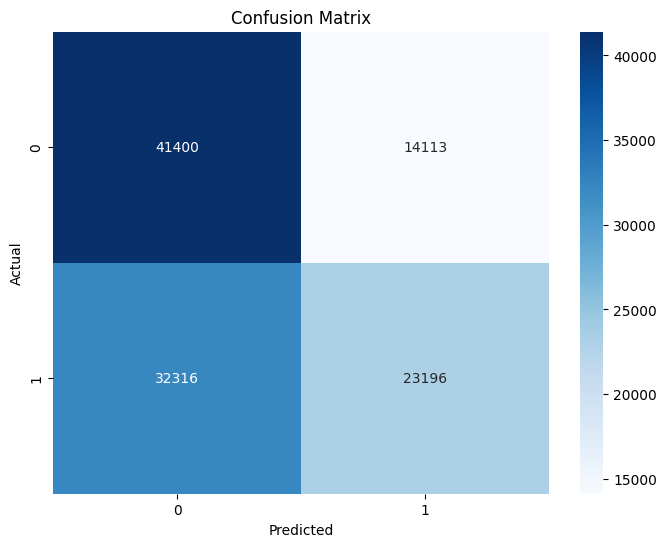

In [ ]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

## **EXPORT MODEL dan SCALLER**

In [ ]:
import pickle

with open('model.pkl', 'wb') as file:
    pickle.dump(random_forest_model, file)

with open('scaler.pkl', 'wb') as file:
    pickle.dump(scaler, file)

In [ ]:
from google.colab import files

# Unduh model.pkl
files.download('model.pkl')

# Unduh scaler.pkl
files.download('scaler.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import sys
import pickle

# Cek ukuran model
model_size = sys.getsizeof(pickle.dumps(random_forest_model))
print(f"Ukuran model: {model_size / 1024 / 1024:.2f} MB")

Ukuran model: 96.96 MB
